<a href="https://www.kaggle.com/code/zohaibhasan/google-capstone-cyclistic-bike-share-with-python?scriptVersionId=118981203" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Background

Introduction Welcome to the Cyclistic bike-share analysis case study! Scenario You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships;Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

About the company In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime. Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members. Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs. Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.

**Business Objective**: 
To increase the number of Casual users to Member users by adopting new strategies.

To follow the steps of Data Analysis, let start with the first step:

# ASK

Following the are the questions ought to be addressed.

* which User is more in numbers?
* How do annual members and casual riders use Cyclistic bikes differently?
* Why would casual riders buy Cyclistic annual memberships?
* How can Cyclistic use digital media to influence casual riders to become members?

# PREPARE

Follow the steps to prepare the data for further steps.


Data for Cyclistics will be downloaded from following link:
https://divvy-tripdata.s3.amazonaws.com/index.html

Data will be used for last 12 months starting from **August,2021 to July,2022**.To download the data use the aforementioned link and download the files in your drive/computer; Save the files with proper name and contain them in a folder.

In [1]:
# Following libraries will be used for prepration of data.

import pandas as pd
import numpy as np
import datetime

Upload the files in the Kaggle'drive in the formate of "CSV"

In [2]:
aug_21= pd.read_csv("../input/google-capstone-projectcyclictics-bike-share/Aug 21.csv")
sep_21= pd.read_csv("../input/google-capstone-projectcyclictics-bike-share/Sept 21.csv")
oct_21= pd.read_csv("../input/google-capstone-projectcyclictics-bike-share/Oct 21.csv")
nov_21= pd.read_csv("../input/google-capstone-projectcyclictics-bike-share/Nov 21.csv")
dec_21= pd.read_csv("../input/google-capstone-projectcyclictics-bike-share/Dec 21.csv")
jan_22= pd.read_csv("../input/google-capstone-projectcyclictics-bike-share/Jan 22.csv")
feb_22= pd.read_csv("../input/google-capstone-projectcyclictics-bike-share/Feb 22.csv")
mar_22= pd.read_csv("../input/google-capstone-projectcyclictics-bike-share/Mar 22.csv")
apr_22= pd.read_csv("../input/google-capstone-projectcyclictics-bike-share/Apr 22.csv")
may_22= pd.read_csv("../input/google-capstone-projectcyclictics-bike-share/May 22.csv")
june_22= pd.read_csv("../input/google-capstone-projectcyclictics-bike-share/June 22.csv")
july_22= pd.read_csv("../input/google-capstone-projectcyclictics-bike-share/July 22.csv")


Concatinate all the files in one data frame

In [3]:
df=[aug_21,sep_21,oct_21,nov_21,dec_21,jan_22,feb_22,mar_22,apr_22,may_22,june_22,july_22]
class csv_conv:
    def __init__(self,data_):
      self.data_=data_
    
    def csv_concat(self):
      df=pd.concat(self.data_)
      return df

df_obj=csv_conv(df)
data_frame=df_obj.csv_concat()


This is how data frame looks with its sample records and fields.

In [4]:
data_frame.head(2)
# As we can see there are few columns which are not required and should be dropped.

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,99103BB87CC6C1BB,electric_bike,2021-08-10 17:15:49,2021-08-10 17:22:44,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.68,member
1,EAFCCCFB0A3FC5A1,electric_bike,2021-08-10 17:23:14,2021-08-10 17:39:24,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.63,member


As you can see: there are few fields in the data frame which are not required their for asked Data Analysis;Therefore, lets delete them in following step.

In [5]:
data_frame.drop(data_frame.columns[[0,4,5,6,7,8,9,10,11]],axis=1,inplace=True)


Data frame after dropping certain columns.

In [6]:
data_frame.head(10)

,rideable_type,started_at,ended_at,member_casual
0,electric_bike,2021-08-10 17:15:49,2021-08-10 17:22:44,member
1,electric_bike,2021-08-10 17:23:14,2021-08-10 17:39:24,member
2,electric_bike,2021-08-21 02:34:23,2021-08-21 02:50:36,member
3,electric_bike,2021-08-21 06:52:55,2021-08-21 07:08:13,member
4,electric_bike,2021-08-19 11:55:29,2021-08-19 12:04:11,member
5,electric_bike,2021-08-19 12:41:12,2021-08-19 12:47:47,member
6,electric_bike,2021-08-19 12:21:50,2021-08-19 12:37:31,member
7,electric_bike,2021-08-13 14:52:35,2021-08-13 14:58:16,member
8,electric_bike,2021-08-17 18:23:55,2021-08-17 18:24:13,member
9,electric_bike,2021-08-04 12:50:53,2021-08-04 13:08:20,member


Lets check the type of data frame

In [7]:
data_frame.dtypes

rideable_type    object
started_at       object
ended_at         object
member_casual    object
dtype: object

As you can see above, the started_at and ended_at are in object data-type and we can not get the trip_duration -a variable- of the trips by object type as we required in data and time formate. lets convert it to data and time formate to get the trip_duration in form of a variable.

In [8]:
data_frame["started_at"]=pd.to_datetime(data_frame["started_at"])
data_frame["ended_at"]=pd.to_datetime(data_frame["ended_at"])


Lets have a look at data type now

In [9]:
data_frame.dtypes

rideable_type            object
started_at       datetime64[ns]
ended_at         datetime64[ns]
member_casual            object
dtype: object

Now lets calculate trip_duration as new column and see how does it look.

In [10]:
data_frame["trip_duration"]=data_frame["ended_at"]-data_frame["started_at"]
data_frame["trip_duration"]


0        0 days 00:06:55
1        0 days 00:16:10
2        0 days 00:16:13
3        0 days 00:15:18
4        0 days 00:08:42
               ...      
823483   0 days 00:23:55
823484   0 days 00:05:12
823485   0 days 00:05:24
823486   0 days 00:05:27
823487   0 days 00:05:20
Name: trip_duration, Length: 5901463, dtype: timedelta64[ns]

Now we will create two more columns with name of "start_date" and "start_time". We will create them by extracting the date and time from "started_at" column; For this sake, we will use split the "started_at" column on the basis of space between data and time. To split,we have to first convert the column into string formate. Overall, we are going to convert the "started_at" column into string form and then we will split into two columns.


In [11]:
data_frame[["start_date","start_time"]]=data_frame["started_at"].astype(str).str.split(" ",n=1,expand=True)

Now we will convert newly created columns into data and time formate accordingly.

In [12]:
data_frame["start_date"]=pd.to_datetime(data_frame["start_date"])
data_frame["start_time"]=pd.to_datetime(data_frame["start_time"])


Lets have a look at new data frame

In [13]:
data_frame.head(2)

,rideable_type,started_at,ended_at,member_casual,trip_duration,start_date,start_time
0,electric_bike,2021-08-10 17:15:49,2021-08-10 17:22:44,member,0 days 00:06:55,2021-08-10,2023-02-12 17:15:49
1,electric_bike,2021-08-10 17:23:14,2021-08-10 17:39:24,member,0 days 00:16:10,2021-08-10,2023-02-12 17:23:14


We have to extract days of week and name of that days to find out, which days are most busiest for cyclistic's users. we can find out the trends of bike use with respect to weekdays. For this, we will extract new columns as **"name_of_day"** from existing column-"started_at"-.
We will use lambda function-which is known an anonymous function- to extract the "day_of_week".

We will further extract the month and year of "started_at" column owing to the need of two new columns: **"year" and 
"Month_name"** .
We need these columns to check the monthly data with respect to use of bikes and which user-Casual or Member-had most rides per month. 




In [14]:
data_frame['day_name'] = data_frame['start_date'].apply(lambda x: x.strftime("%A"))
data_frame["Month_name"]=data_frame["start_date"].apply(lambda x: x.strftime("%B"))
data_frame["year"]=data_frame['start_date'].apply(lambda x: x.year)
data_frame['day_name'].unique()

# lets see down, unique weekdays


array(['Tuesday', 'Saturday', 'Thursday', 'Friday', 'Wednesday', 'Sunday',
       'Monday'], dtype=object)

lets look at the data frame and newly added aforementioned columns in data frame.

In [15]:
data_frame.head(2)

,rideable_type,started_at,ended_at,member_casual,trip_duration,start_date,start_time,day_name,Month_name,year
0,electric_bike,2021-08-10 17:15:49,2021-08-10 17:22:44,member,0 days 00:06:55,2021-08-10,2023-02-12 17:15:49,Tuesday,August,2021
1,electric_bike,2021-08-10 17:23:14,2021-08-10 17:39:24,member,0 days 00:16:10,2021-08-10,2023-02-12 17:23:14,Tuesday,August,2021


# PROCESS

After pooling and preparing data from source , next step of Data Analysis is called Process. In this step, we will eliminate the errors from the data so that clean and organized data can be obtained for the Analysis.

Lets check if the "started_at" is greater than "ended_at"? .If so, its means "trip_duration" will not contain valid duration of the trip. 

lets check with following function and count the number of rows in which "started_at" is greater than "ended_at" with respect to dates.

In [16]:
class ValidRow:
  def __init__(self, data_frame):
    self.data_frame = data_frame

  def invalid_rows(self):
    invalid_rows = self.data_frame["ended_at"] <= self.data_frame["started_at"]
    count_started_at = invalid_rows.sum()
    return count_started_at

valid_row_obj = ValidRow(data_frame)
invalid_count = valid_row_obj.invalid_rows()
print(invalid_count)






636


As we can see from above function: There are 636 records in which "started_at" is greater than "ended_at". Lets remove the rows.

In [17]:
data_frame.drop(data_frame[data_frame["ended_at"] <= data_frame["started_at"]].index,inplace = True)

Check again,if there is still any error persists with above-mentioned error-type.

In [18]:

invalid_count = valid_row_obj.invalid_rows()
print(invalid_count)





0


You can see above , There is 0 error in records after removing the invalid dates.

In [19]:
#  Sorting the data with "start_date"
data_frame.sort_values(by=['start_date'],inplace=True,ascending=False)


Check the sum of Null values in all the columns . 

In [20]:
data_frame.isnull().sum()

rideable_type    0
started_at       0
ended_at         0
member_casual    0
trip_duration    0
start_date       0
start_time       0
day_name         0
Month_name       0
year             0
dtype: int64

No Null values found in any column of data frame.

Lets check out if any duplicated rows in the data frame

In [21]:
data_frame.duplicated().any()

True

In [22]:
# let check the sum of duplicated records
data_frame.duplicated().sum()

500

As we can see, there are 500 duplicated records. Let us drop these records and recheck the duplicated sum

In [23]:
data_frame.drop_duplicates(keep=False,inplace=True)

In [24]:
data_frame.duplicated().sum()

0

There is no duplicated record in the data frame;Therefore, data is in cleaned form and can be used for Analyze step of the Data Analysis. 

# ANALYZE

Now data is cleaned and stored appropriately and has been prepared for analysis, start putting it to work

Let us find out the mean of trip_duration for both users of cyclistics-Casual & Manual.
We will analyse: whose mean of trip_duration is greater.

In [25]:
data_casual = data_frame[data_frame["member_casual"]=="casual"]
data_casual_ride_len_mean = data_casual["trip_duration"].mean()
data_casual_ride_len_mean


Timedelta('0 days 00:29:13.222046797')

In [26]:
data_member = data_frame[data_frame["member_casual"]=="member"]
data_member_ride_len_mean = data_member["trip_duration"].mean()
data_member_ride_len_mean

Timedelta('0 days 00:12:56.028726491')

From above code, We can clearly see: the mean trip_duration of casual-user is far greater than  member-user.

Now lets check: what is the maximum trip_duration of both users. 

In [27]:
data_member_ride_len_max = data_member["trip_duration"].max()
data_member_ride_len_max

Timedelta('1 days 01:59:54')

In [28]:
data_casual_ride_len_max = data_casual["trip_duration"].max()
data_casual_ride_len_max

Timedelta('28 days 21:49:10')

we can see that the maximum trip_duration of casual users is much higher as compare to members. 

lets take a look at mode value with respect to week days for both the users.

In [29]:

member_ride_day_mode = data_member['day_name'].mode()
member_ride_day_mode


0    Tuesday
dtype: object

In [30]:
data_member_ride_day_mode = data_casual['day_name'].mode()
data_member_ride_day_mode

0    Saturday
dtype: object

From above comparison, we can find : casual users are using the service mostly on weekends;However,member users are using the bikes on Tuesdays.

Let us dig more and see , how many trips are made by each user with respect to weekdays.


In [31]:
mem_rides_pday= data_frame[data_frame["member_casual"]=="member"].groupby("day_name")["trip_duration"].count()
mem_rides_pday


day_name
Friday       466227
Monday       471916
Saturday     453043
Sunday       417538
Thursday     522093
Tuesday      522838
Wednesday    522114
Name: trip_duration, dtype: int64

In [32]:
cas_rides_pday = data_frame[data_frame["member_casual"]=="casual"].groupby('day_name')["trip_duration"].count()
cas_rides_pday

day_name
Friday       347298
Monday       299365
Saturday     527011
Sunday       475057
Thursday     315825
Tuesday      273527
Wednesday    281512
Name: trip_duration, dtype: int64

As we have seen above, weekly number of trips by both users.

lets take a look monthly number of trips as well, to check out: in which months cyclistics company has sold their services to both users. 

In [33]:
memm_rides_ridetype= data_frame[data_frame["member_casual"]=="member"].groupby("Month_name")["trip_duration"].count()
memm_rides_ridetype

Month_name
April        244573
August       391250
December     177616
February      94099
January       85158
July         417069
June         399798
March        193954
May          354077
November     252778
October      373595
September    391802
Name: trip_duration, dtype: int64

In [34]:
cas_rides_ridetype= data_frame[data_frame["member_casual"]=="casual"].groupby("Month_name")["trip_duration"].count()
cas_rides_ridetype

Month_name
April        126291
August       412178
December      69657
February      21383
January       18505
July         405705
June         368721
March         89782
May          280183
November     106771
October      256927
September    363492
Name: trip_duration, dtype: int64

# SHARE

Now that we have performed analysis and got some insights into data, lets share the findings by visualizations . I would be using **"Tableau"** for data visualizations.



Lets find out total numbers of each users taking bike services.

In [35]:
member_type_counts =data_frame["member_casual"].value_counts()
member_type_counts

member    3375769
casual    2519595
Name: member_casual, dtype: int64

**Number of Users-Casual & Member**

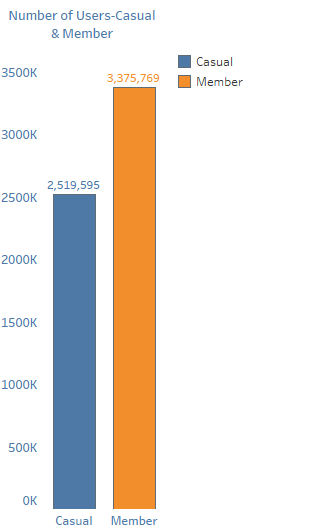

**Percentage of Users-Type**

Pie chart showing the percentage of each type of user.

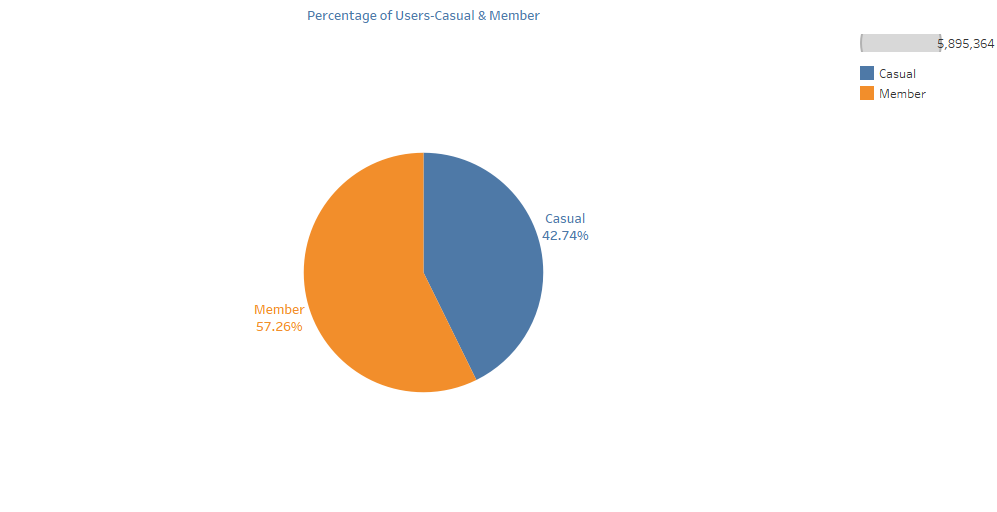

**Number of Monthly Users-Casual & Member**

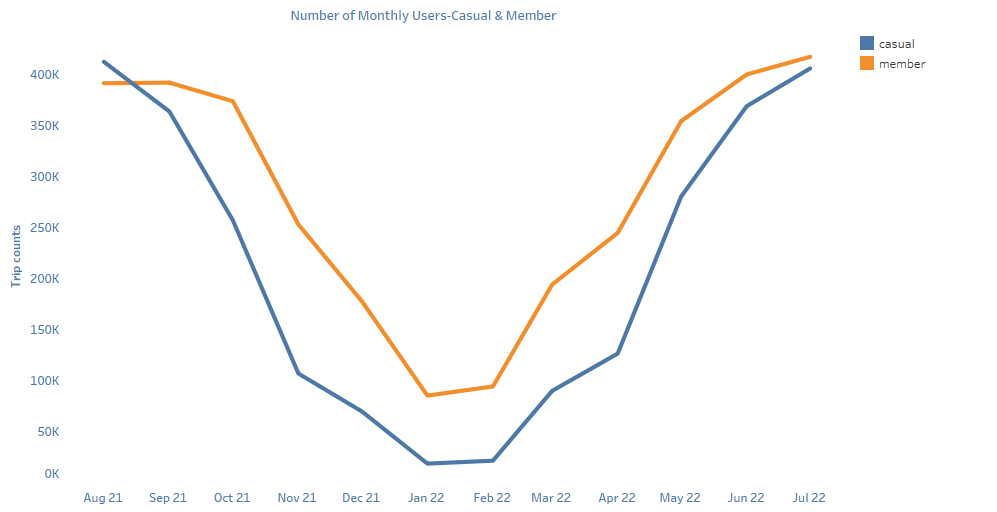

From the above visualization, it can be seen that the number of rides increase in the summer months (June-August) for both members and casual users. One of the reasons can be Vacations and excercise trends in summers. 

**Weekly Trip counts-Casual & Member**

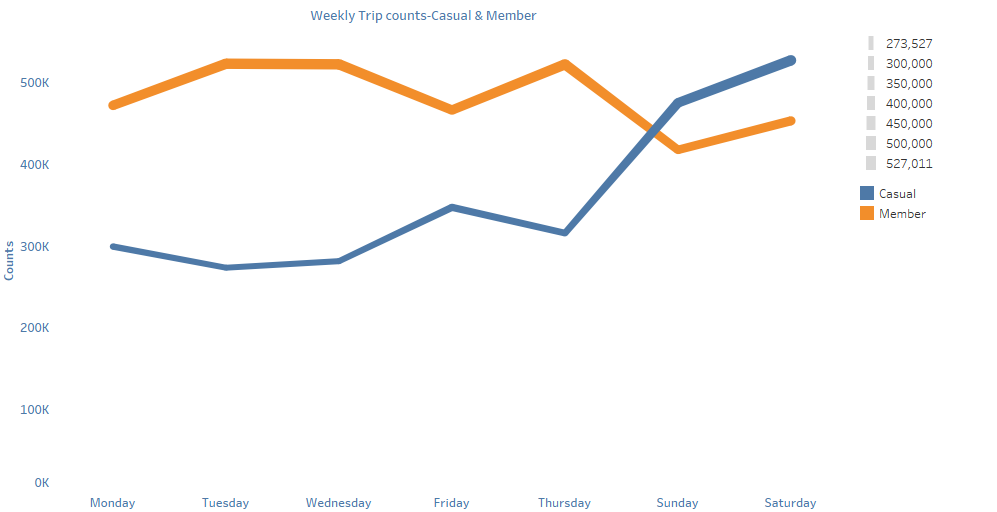

Above visualization shows that casual members are using the bike services mostly on weekends;This can be owing to outing activites and social activities. However, members have used the bikes mostly on Tuesdays. 

**Ride Type used by users(Casual & Manual)**

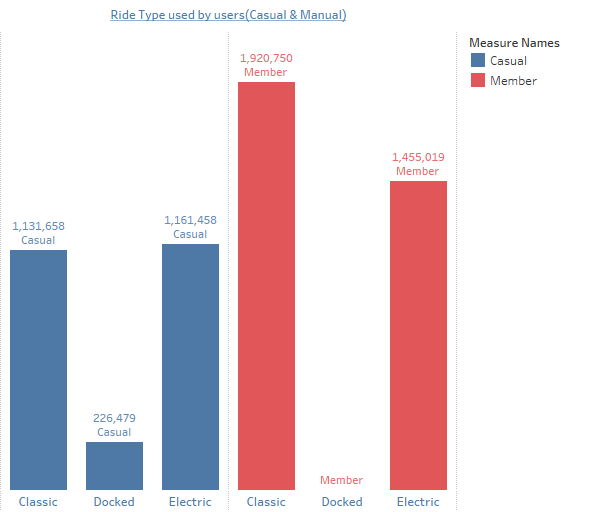

Above Visualization shows: member users are not using docked bike;However, casual users are using docked bike.

# ACT

We see that the Number of casual members are quite high, the company can give them some incentive to become loyal costumers through becoming annual member .

* The incentive could be that the company could lower the charges for the rides for member customers than a casual users. This would encourage to casual users to become regular members.
* The bike company can also give bonus points for each ride to the member user. Bonus points can be accumulated to secure free rides. Hopefully this would aim to see an increase in number of rides and also member subscriptions.
* We also see that casual users are more active on weekends so we lower weekend rates for member users to encourage them to use rides on weekend too and this will also encourage causal riders to become member subscribers.
* Discounts can also be given e.g. may be after every 5 miles or 5% to 10% after 10 minutes of ride.
* We see that the casual members also use Docker bikes so may be we can provide some discounts on riding docker bikes for member users. so that it would encourage the causal users to buy annual subscriptions.
* Through advertisements discounts can be offered during the months June-August to attract casual to buy memberships.